In [62]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier

In [20]:
file = 'train.csv'
data = pd.read_csv(file)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
testfile = 'test.csv'
test_data = pd.read_csv(testfile, index_col = 0)
test_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [22]:
# Explore and clean data
for i in data.columns:
    print(i)

battery_power
blue
clock_speed
dual_sim
fc
four_g
int_memory
m_dep
mobile_wt
n_cores
pc
px_height
px_width
ram
sc_h
sc_w
talk_time
three_g
touch_screen
wifi
price_range


In [23]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [24]:
data.shape

(2000, 21)

Data contains 2000 records.


In [25]:
data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

Data is equally split between all price ranges.

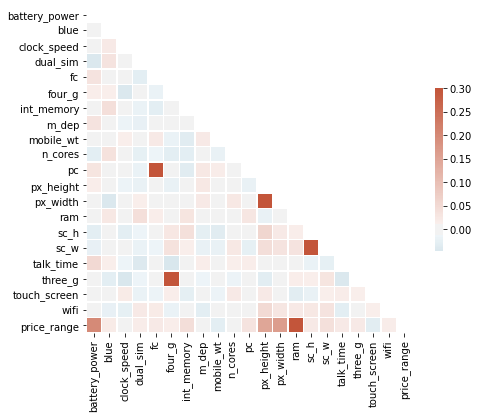

In [26]:
# check correlation
corr = data.corr()
datacorr = corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f,ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.5})

Price range has high correlation with battery power, resolution and ram.

Target variable is has a range between 0 and 3:
0 - low cost
1 - medium cost
2 - high cost
3 - very high cost

Text(0.5, 1.0, 'Phone Price ranges')

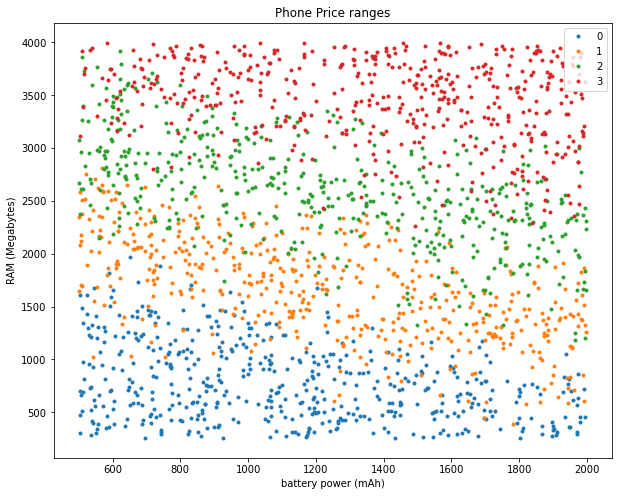

In [76]:
# visualize data
viz = pd.DataFrame(data['battery_power'])
viz['ram'] = data['ram']
viz['price_range'] = data['price_range']

groups = viz.groupby('price_range')
plt.figure(figsize = (10,8))
for name, group in groups:
    plt.plot(group['battery_power'], group['ram'], marker = '.', linestyle = '', label = name)
plt.xlabel('battery power (mAh)')
plt.ylabel('RAM (Megabytes)')
plt.legend()
plt.title('Phone Price ranges')
    

# Creating Baseline Model (logistic regression)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# Create target and predictor variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [30]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [31]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [32]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.2)

# Create Baseline Models

In [33]:
# Define and fit model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [34]:
def evaluate_model(model, X_test, y_test, model_name):
    roc_score = metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    preds = model.predict(X_test)
    print(f'Model: {model_name}' )
    print('Model score:', round(model.score(X_test, y_test),2))
    print('----------------------------------------------------------')
    print('ROC_AUC Score:', round(roc_score, 2))
    print('----------------------------------------------------------')
    print('Classification Report:\n')
    print(metrics.classification_report(y_test, preds))
    

In [35]:
evaluate_model(lr, X_test, y_test, 'logistic regression')

Model: logistic regression
Model score: 0.65
----------------------------------------------------------
ROC_AUC Score: 0.89
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.72      0.81       109
           1       0.52      0.64      0.57        89
           2       0.55      0.45      0.49       106
           3       0.64      0.78      0.70        96

    accuracy                           0.65       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.67      0.65      0.65       400



Not a very high score to beat, lets try K-NN.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# find optimal k
knn = KNeighborsClassifier()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv = 5)
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [37]:
knn_best = knn_gs.best_estimator_
print(knn_best)

KNeighborsClassifier(n_neighbors=15)


In [38]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, 'knn')

Model: knn
Model score: 0.93
----------------------------------------------------------
ROC_AUC Score: 1.0
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       109
           1       0.91      0.98      0.94        89
           2       0.90      0.90      0.90       106
           3       0.93      0.90      0.91        96

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [39]:
evaluate_model(knn, X_train, y_train, 'knn')

Model: knn
Model score: 0.95
----------------------------------------------------------
ROC_AUC Score: 1.0
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       391
           1       0.93      0.95      0.94       411
           2       0.91      0.92      0.92       394
           3       0.97      0.94      0.96       404

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



KNN had perfect AUC score and an accuracy score of 0.93. This accuracy score will be our baseline.

In [40]:
# Check other baseline models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

svm = SVC(probability=True)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, 'SVC')

Model: SVC
Model score: 0.96
----------------------------------------------------------
ROC_AUC Score: 1.0
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       109
           1       0.90      0.99      0.94        89
           2       0.97      0.90      0.93       106
           3       0.96      0.97      0.96        96

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



In [41]:
# Find optimal leaf nodes
dt = DecisionTreeClassifier()
params_dt = {'max_leaf_nodes': np.arange(1, 100)}
dt_gs = GridSearchCV(dt, params_dt, cv = 5)
dt_gs.fit(X_train, y_train)
dt_best = dt_gs.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_leaf_nodes=51)


In [42]:
dt = DecisionTreeClassifier(max_leaf_nodes = 51)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, 'DecisionTree')

Model: DecisionTree
Model score: 0.86
----------------------------------------------------------
ROC_AUC Score: 0.95
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       109
           1       0.79      0.84      0.82        89
           2       0.81      0.85      0.83       106
           3       0.92      0.86      0.89        96

    accuracy                           0.86       400
   macro avg       0.87      0.86      0.86       400
weighted avg       0.87      0.86      0.87       400



# Using a bagging classifier

In [43]:
# Bagging KNN
from sklearn.ensemble import BaggingClassifier
knnbag = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=15))
knnbag.fit(X_train, y_train)

evaluate_model(knnbag, X_test, y_test, 'KNN Bagging')

Model: KNN Bagging
Model score: 0.94
----------------------------------------------------------
ROC_AUC Score: 1.0
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       109
           1       0.90      0.99      0.94        89
           2       0.91      0.91      0.91       106
           3       0.95      0.90      0.92        96

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400



In [44]:
logregbag = BaggingClassifier(base_estimator=LogisticRegression())
logregbag.fit(X_train, y_train)
evaluate_model(logregbag, X_test, y_test, 'Logistic Regession Bagging')

Model: Logistic Regession Bagging
Model score: 0.65
----------------------------------------------------------
ROC_AUC Score: 0.89
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.72      0.82       109
           1       0.52      0.66      0.58        89
           2       0.55      0.43      0.48       106
           3       0.64      0.78      0.70        96

    accuracy                           0.65       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.67      0.65      0.65       400



In [45]:
svmbag = BaggingClassifier(base_estimator=SVC(probability=True))
svmbag.fit(X_train, y_train)
evaluate_model(svmbag, X_test, y_test, 'SVM Bagging')

Model: SVM Bagging
Model score: 0.96
----------------------------------------------------------
ROC_AUC Score: 1.0
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       109
           1       0.92      0.99      0.95        89
           2       0.97      0.92      0.94       106
           3       0.95      0.97      0.96        96

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [46]:
dtbag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes = 53))
dtbag.fit(X_train, y_train)
evaluate_model(dtbag, X_test, y_test, 'Decision Tree Bagging')

Model: Decision Tree Bagging
Model score: 0.88
----------------------------------------------------------
ROC_AUC Score: 0.98
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       109
           1       0.81      0.92      0.86        89
           2       0.85      0.77      0.81       106
           3       0.88      0.91      0.89        96

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.88      0.88       400



In [66]:

rf= RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, 'Rf Model')

Model: Rf Model
Model score: 0.88
----------------------------------------------------------
ROC_AUC Score: 0.98
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       109
           1       0.80      0.88      0.84        89
           2       0.82      0.79      0.80       106
           3       0.91      0.89      0.90        96

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



# Using a Boosting Classifier

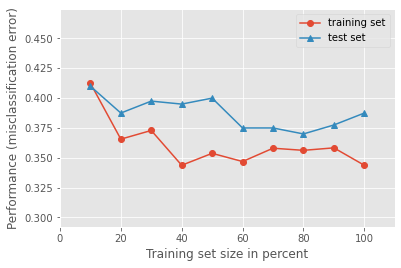

In [52]:
from sklearn.ensemble import AdaBoostClassifier

logregboost = AdaBoostClassifier(base_estimator = LogisticRegression(), n_estimators=10)
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, logregboost, print_model = False, style = 'ggplot')
plt.title('Logistic Regression AdaBoost')
plt.show()

In [53]:
evaluate_model(logregboost,X_test, y_test, 'Log Reg Booster')

Model: Log Reg Booster
Model score: 0.61
----------------------------------------------------------
ROC_AUC Score: 0.88
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       109
           1       0.49      0.47      0.48        89
           2       0.55      0.22      0.31       106
           3       0.57      0.91      0.70        96

    accuracy                           0.61       400
   macro avg       0.60      0.61      0.58       400
weighted avg       0.60      0.61      0.58       400



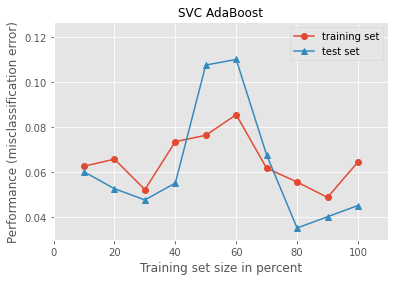

In [61]:
boosting = AdaBoostClassifier(base_estimator = SVC(probability=True), n_estimators=10)
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model = False, style = 'ggplot')
plt.title('SVC AdaBoost')
plt.show()

In [54]:
evaluate_model(boosting, X_test, y_test, 'SVC Booster')

Model: SVC Booster
Model score: 0.94
----------------------------------------------------------
ROC_AUC Score: 1.0
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       109
           1       0.98      0.90      0.94        89
           2       0.92      0.92      0.92       106
           3       0.92      0.96      0.94        96

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



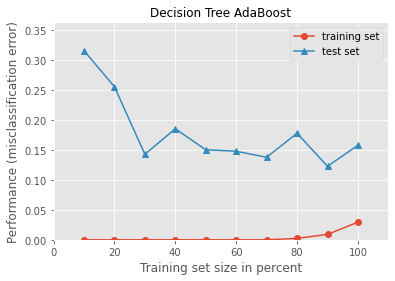

In [60]:
dtbooster = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_leaf_nodes = 51), n_estimators=10)
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, dtbooster, print_model = False, style = 'ggplot')
plt.title('Decision Tree AdaBoost')
plt.show()

In [75]:
evaluate_model(dtbooster, X_test, y_test, 'DecisionTree Booster')

Model: DecisionTree Booster
Model score: 0.84
----------------------------------------------------------
ROC_AUC Score: 0.97
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       109
           1       0.75      0.87      0.80        89
           2       0.75      0.78      0.76       106
           3       0.91      0.81      0.86        96

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



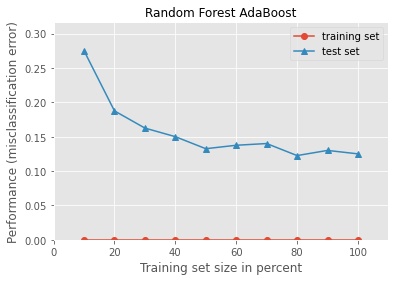

In [72]:
rfbooster = AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion = 'entropy'), n_estimators = 10)
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, rfbooster, print_model = False, style = 'ggplot')
plt.title('Random Forest AdaBoost')
plt.show()

In [73]:
evaluate_model(rfbooster, X_test, y_test, 'Random Forest Booster')

Model: Random Forest Booster
Model score: 0.88
----------------------------------------------------------
ROC_AUC Score: 0.98
----------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       109
           1       0.78      0.89      0.83        89
           2       0.84      0.75      0.80       106
           3       0.90      0.92      0.91        96

    accuracy                           0.88       400
   macro avg       0.87      0.88      0.87       400
weighted avg       0.88      0.88      0.87       400



# USE CASE
- We Will use our best model to hypothetically classify a pricing model on the Oppo A53s.
- Source: (https://www.oppo.com/au/smartphones/series-a/a53s/specs/)

In [79]:
# oppo a53s specs
# best overall predictor = SVC
specs = [2000, 1, 1.8, 0, 8, 1, 64, 0.8, 186, 8, 13, 1600, 720, 4000, 164, 75, 19.3, 1, 1, 1]
svm.predict(np.array([specs]))[0]


3

- Our pricing model predicted to be high price model. 
- Indicates our data is outdated, as phone technology has advanced far beyond the capabilities of when this dataset was sourced.
- The Oppo A53s is in real world, a low priced phone model in 2021, but is predicted to be high priced. 